In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [4]:
# ------------- The import statement --------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('netflix_titles.csv')

In [7]:
data.shape

(8807, 12)

In [8]:
# The number of movies/tv shows 
number = data.shape[0]
print("There are total {} movies/Tv shows on Netflix".format(number))

There are total 8807 movies/Tv shows on Netflix


In [9]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
data.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


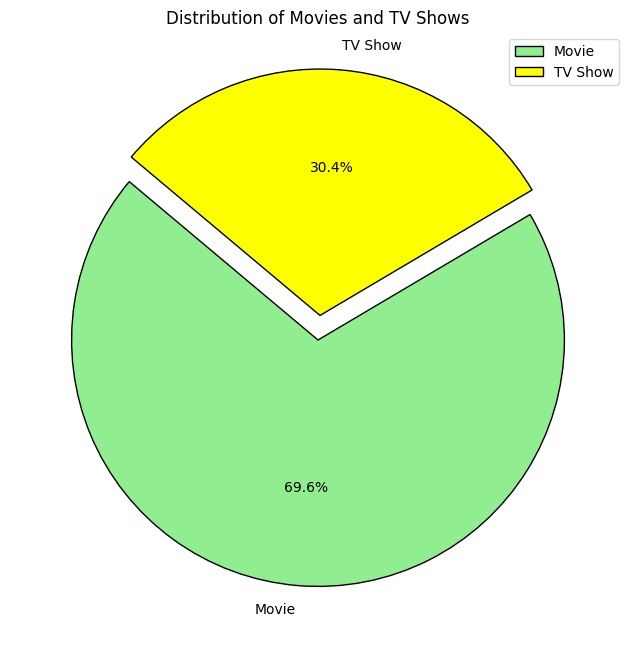

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [11]:
# Assume "type" is the column representing whether the entry is a movie or TV show
type_counts = data['type'].value_counts()

# Plotting the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140,explode = [0, 0.1], colors=['lightgreen', 'yellow'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Movies and TV Shows')
plt.legend()
plt.show()

# Display the counts
print(type_counts)

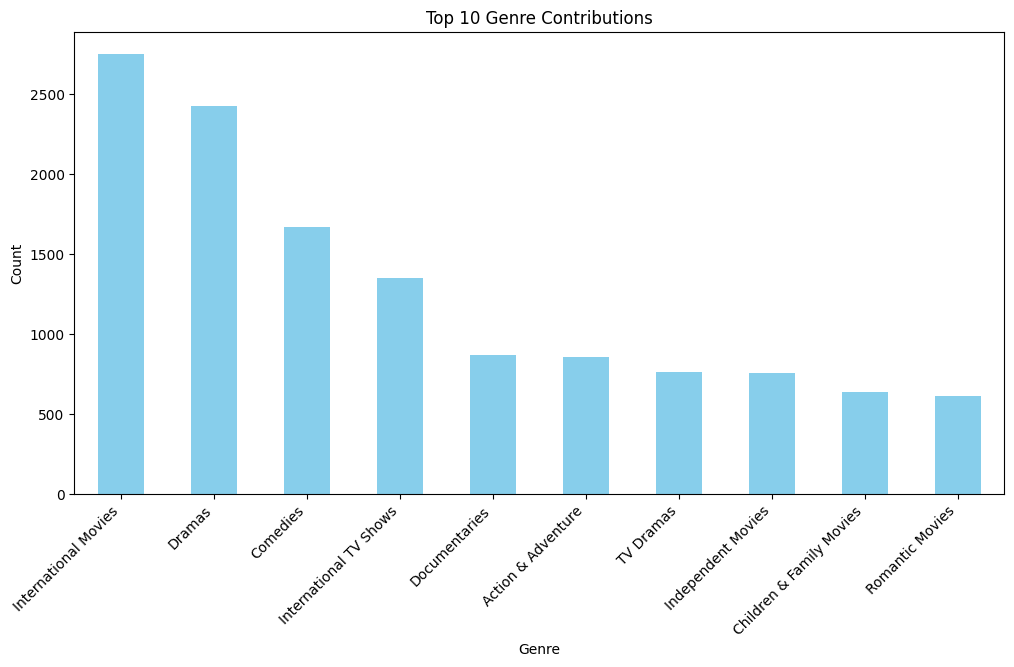

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [12]:
# Split the 'listed_in' column to extract genres (assuming genres are separated by commas)
genres = data['listed_in'].str.split(', ', expand=True).stack()

# Count the occurrence of each genre
genre_counts = genres.value_counts()

# Plotting the genre contribution using a bar chart (top 10 genres)
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Genre Contributions')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Display the genre counts (optional)
print(genre_counts)

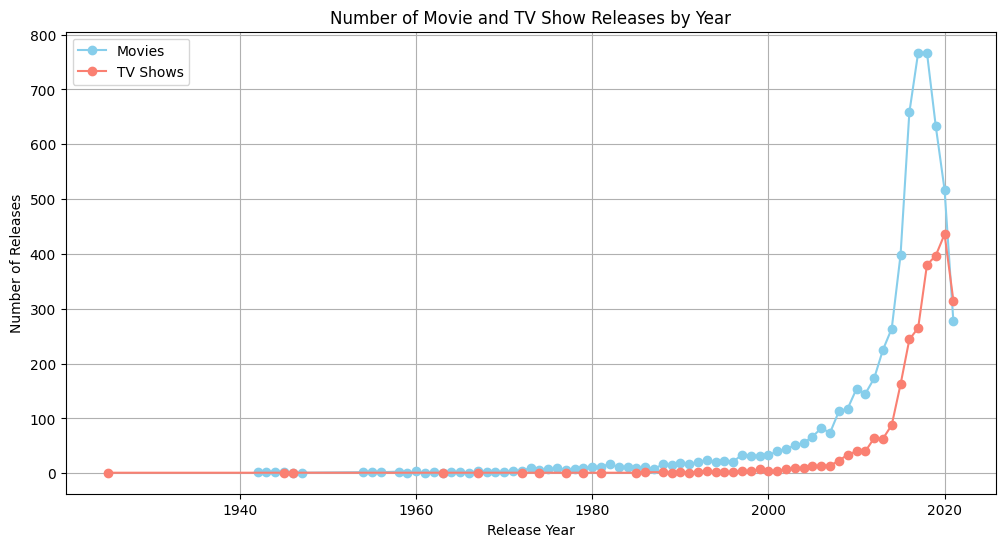

Year with the most movie releases: 2017 (767 releases)
Year with the most TV show releases: 2020 (436 releases)


In [13]:
# Filter the dataset for movies and TV shows separately
movies_data = data[data['type'] == 'Movie']
tv_shows_data = data[data['type'] == 'TV Show']

# Count the number of releases by year for movies
movies_by_year = movies_data['release_year'].value_counts().sort_index()

# Count the number of releases by year for TV shows
tv_shows_by_year = tv_shows_data['release_year'].value_counts().sort_index()

# Plotting the number of movie releases by year
plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values, label='Movies', color='skyblue', marker='o')
plt.plot(tv_shows_by_year.index, tv_shows_by_year.values, label='TV Shows', color='salmon', marker='o')
plt.title('Number of Movie and TV Show Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()

# Find the year with the most movie releases and TV show releases
most_movie_year = movies_by_year.idxmax()
most_tv_show_year = tv_shows_by_year.idxmax()

print(f"Year with the most movie releases: {most_movie_year} ({movies_by_year.max()} releases)")
print(f"Year with the most TV show releases: {most_tv_show_year} ({tv_shows_by_year.max()} releases)")

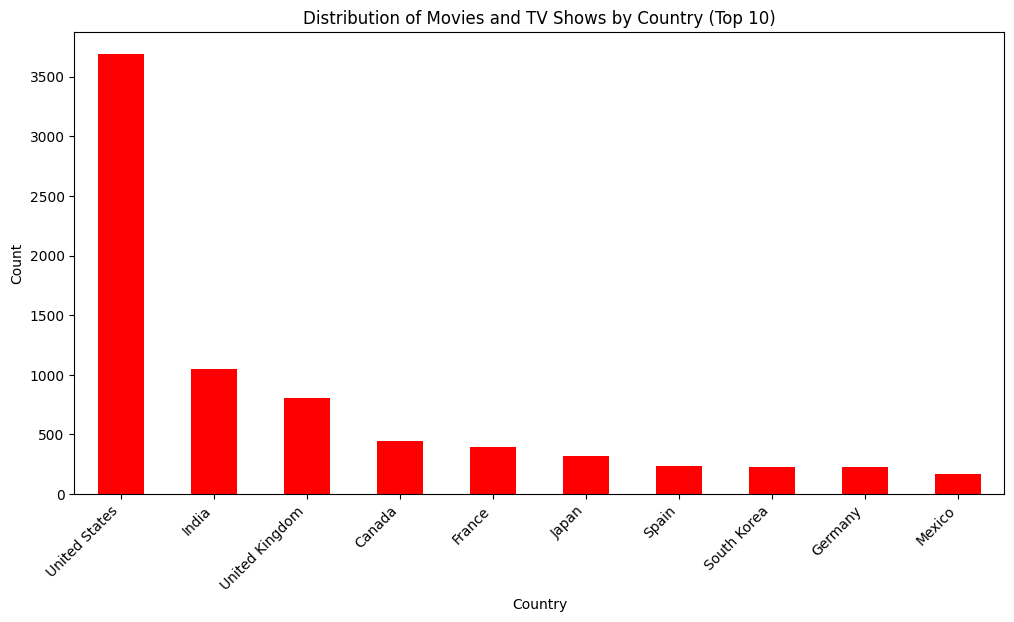

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: count, Length: 127, dtype: int64


In [14]:
# Split the 'country' column to extract multiple countries (assuming countries are separated by commas)
countries = data['country'].str.split(', ', expand=True).stack()

# Count the occurrence of each country
country_counts = countries.value_counts()

# Plotting the distribution of movies and TV shows by country (top 10 countries)
plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar', color='red')
plt.title('Distribution of Movies and TV Shows by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Display the country counts (optional)
print(country_counts)

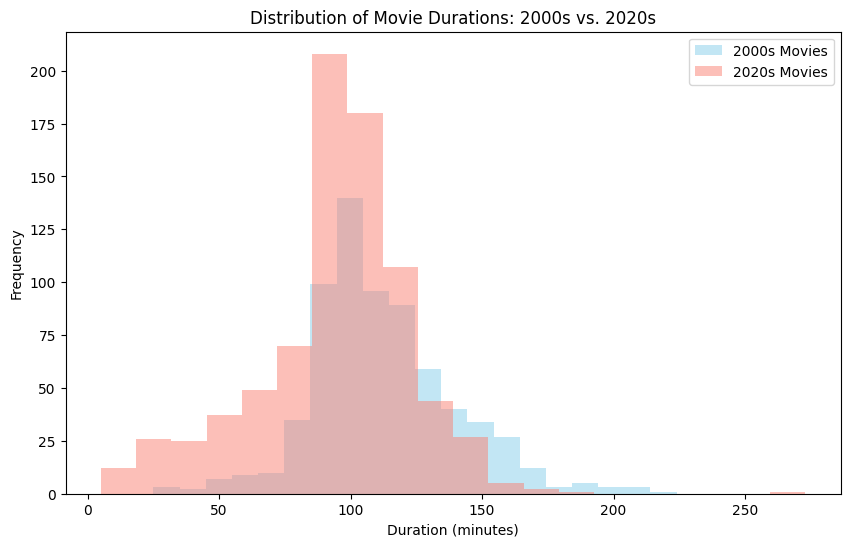

In [15]:
# Filtering the dataset for movies released in the 2000s and 2020s
movies_2000s = data[(data['type'] == 'Movie') & (data['release_year'] >= 2000) & (data['release_year'] <= 2009)]
movies_2020s = data[(data['type'] == 'Movie') & (data['release_year'] >= 2020)]

# Extract and convert duration to numeric values (assuming 'duration' is in minutes)
movies_2000s['duration'] = pd.to_numeric(movies_2000s['duration'].str.replace(' min', ''))
movies_2020s['duration'] = pd.to_numeric(movies_2020s['duration'].str.replace(' min', ''))

# Plotting the distribution of movie durations for the 2000s and 2020s
plt.figure(figsize=(10, 6))
plt.hist(movies_2000s['duration'], bins=20, alpha=0.5, label='2000s Movies', color='skyblue')
plt.hist(movies_2020s['duration'], bins=20, alpha=0.5, label='2020s Movies', color='salmon')
plt.title('Distribution of Movie Durations: 2000s vs. 2020s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()